In [49]:
#Q1:

def Converter():
    
    x=input("Enter a value for x:")  
    origin_type=input("Enter the origin type (bin,dec,hex):") #here we specify the type of converstion that we want
    destination_type=input("Enter the destination type (bin,dec,hex):") #...
    
    #We have total number of four conditions which are as below:

    if origin_type=="bin" and destination_type=="dec":   #converting bin to dec
        x_list=[int(x) for x in str(x)]
        print("The output is:", sum([((2**(len(x_list)-1-i)))*x_list[i] for i in range(len(x_list))]))
        
    elif origin_type=="dec" and destination_type=="bin":  #converting dec to bin 
        x=int(x)
        temp, remain= x,0
        x_dec=[]
        while temp!=0:
            remain= temp%2
            temp= int(temp/2)
            x_dec.append(str(remain))
        x_dec.reverse()
        print("The output is:", int("".join(x_dec)))
    
    elif origin_type=="dec" and destination_type=="hex":   #coverting dec to hex
        hex_dict = {10:"A",11:"B",12:"C",13:"D", 14:"E",15: "F"}  #I made a dictionary for hex numebrs
        x=int(x)
        temp, remain= x,0
        x_dec=[]
        
        while temp!=0:
            remain= temp%16
            temp= int(temp/16)
            
            if remain<10: x_dec.append(str(remain))
            else: x_dec.append(hex_dict.get(remain))
        x_dec.reverse()
        print("The output is:", "".join(x_dec))
        
    elif origin_type=="hex" and destination_type=="dec":  #converting hex to dec
        
        hex_to_dec= {'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'A':10,'B':11,'C':12,'D':13,'E':14,'F':15}
        x_list=[str(x) for x in x]
        print("The output is:",sum([((16**(len(x_list)-1-i)))*(hex_to_dec.get(x_list[i])) for i in range(len(x_list))])) 
    
    
Converter()

Enter a value for x:1100101
Enter the origin type (bin,dec,hex):dec
Enter the destination type (bin,dec,hex):hex
The output is: 10C945


In [50]:
#Q2

def converter():
    x=input("Please enter a 32 digit binary number:") 
    #You can copy from here or enter an arbitrary 32 bits number
    #00000011111000000000000000000000
    bits= [int(x) for x in list(x)]       

    #We dedicate the first bit to the sign, the secnod 8 bits to the exponent, and the remaining ones to the mantissa
    sign=[+1 if bits[0]==0 else -1]      #list for sign
    exponent = bits[1:9]                 #list for exponent  
    mantissa= bits[9:]                   #list for mantissa 

    ex=sum([((2**(len(exponent)-1-i)))*exponent[i] for i in range(len(exponent))])  #value for exponent
    mant= 1+ sum([mantissa[i]*(2**(-i-1)) for i in range(len(mantissa))])           #value for mantissa
    Number= sign[0] * (2**(ex-127)) * mant      #our final number
 
    print("The number is:", Number)

converter()    
    

Please enter a 32 digit binary number:00000011111000000000000000000000
The number is: 1.316553672920962e-36


In [14]:
#Q3:

import math 

x1,x2=1,1             #initial values for our variables

while(x1!=0):
    last_one=x1
    x1=x1/2                                       #we divide our varibale by 2 until it reaches the limit
print("The underflow Limit is:", last_one)

while(x2!=math.inf):
    last_one=x2                                #we multiply our varibale by 2 until it reaches the limit
    x2=x2*2
print("The overflow Limit is:",last_one)


SyntaxError: invalid syntax (<ipython-input-14-6cac8d619f02>, line 14)

In [51]:
#Q4:

step=0.5
x1,x2=1,2

while(x1!=x2):                   #we start with x=1 and add (1/2)*n for n=1,2,3,... 
    last_one = x1                #consequently our variable approches x=2
    x1=x1+step                   #and finally we reach a point in which machine cannot detect the differnce between x1 & x2
    step=step/2

print("The Machine Precision is:", x2-last_one)

The Machine Precision is: 2.220446049250313e-16


In [53]:
#Q5:

#5.a
import numpy as np 

def Quadra_a(a,b,c):
    x1= (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
    x2= (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    return x1,x2

print("The first answewr:", Quadra_a(0.001, 1000, 0.001))

#5.b
def Quadra_b(a,b,c):
    x1 = ((-b + np.sqrt(b**2 - 4*a*c)) * (-b - np.sqrt(b**2-4*a*c)))/((-b - np.sqrt(b**2 - 4*a*c))*(2*a))
    x2 = ((-b - np.sqrt(b**2 - 4*a*c)) * (-b + np.sqrt(b**2-4*a*c)))/((-b + np.sqrt(b**2 - 4*a*c))*(2*a))
    return x1,x2

print("The seocnd one:", Quadra_b(0.001, 1000, 0.001))

#I think the problem happens beacuse -b approxiametly equals to -np.sqrt(...)

The first answewr: (-9.999894245993346e-07, -999999.999999)
The seocnd one: (-9.999894245993346e-07, -999999.9999990001)


The derivate using definition is:
 1.0099999999999998
The analytic derivative is:
 1.0000000000000009

The Accuracy for each delta graph:


Text(0, 0.5, 'Accuracy')

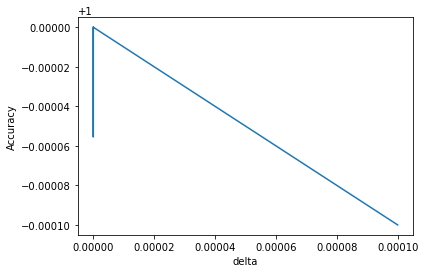

In [4]:
#Q6:

import numpy as np
import matplotlib.pyplot as plt 
from scipy.misc import derivative


def der(f,x,delta):    #defining a function according to our definition
    return (f(x+delta) - f(x))/delta
f= lambda x: x**2 - x

print("The derivate using definition is:\n", der(f,1, 0.01))          #with derivate defintion
print("The analytic derivative is:\n",derivative(f,1, 0.01))    # analytic solution

#For the next part we should define the accuracy parameter:
def accuracy(f,x,delta): 
    #we define the accuracy parameter assuming that the true value is the one from analytic method
    #which is the 1-[differnce between analytic and calculated derivatives divided by the calculated derivative]
    return (1-(np.abs((der(f,x,delta)- derivative(f,x,delta))/der(f,x,delta))))

delta_list=[10**-4, 10**-6, 10**-8, 10**-10, 10**-12, 10**-14] 
acc_list= [accuracy(f,1,delta) for delta in delta_list]    #we calculate the accuracy for each value of delta

print("\nThe Accuracy for each delta graph:")  
plt.plot(delta_list, acc_list)       #finally we plot delta for each accuracy
plt.xlabel('delta')
plt.ylabel('Accuracy')

#As we it can be seen, the accuracy decreases with increasing of delta

In [5]:
#Q7:

import time
import numpy as np

#7.a

y= lambda x: np.sqrt(1-x**2)
N=100
h=2/N          #dx
I=0            #initial value for the Integral
x=-1           #starting point of the Integral
    
for i in range(N): 
    I+= h*y(x)
    x+= h
    
print("Calculated value for N=100:\n",I)
print("True value:\n", np.pi/2)

# 7.b

n=900000 #we strat from this point and add 1000 in each step to have a more precise estimation
t=0      #our timer

while(t<1):   #we go up to the point which exceeds one second
    h=2/n
    I=0
    x=-1
    start = time.time()
    
    for i in range(n): 
        I+= h*y(x)          #area of each rectangle
        x+= 2/n
        
    end = time.time()
    t=end - start
    n+=1000                 #our step in increasing the number of rectangles

print("\nless than 1 second approxiamte corresponding n:\n",n)

# Now we should see what's the gain when running for 1 min:

start = time.time()
y= lambda x: np.sqrt(np.abs(1-x**2))

N=35000000   
#This number is calculated through try and fail method, calculating in a analytic way takes to much time!
#But we confirm the amount of time this number takes to be calculated:

h=2/N
I=0
x=-1
for i in range(N): 
    I+= h*y(x)
    x+= h

print("\n")
end = time.time()

print("one minute gain corresponds to n:\n",N)
print("It takes {} seconds for the calculations".format(end-start))

Calculated value for N=100:
 1.5691342555492493
True value:
 1.5707963267948966

less than 1 second approxiamte corresponding n:
 921000


one minute gain corresponds to n:
 35000000
It takes 62.26023459434509 seconds for the calculations
